In [2]:
import lmfit
import numpy as np
import matplotlib.pyplot as plt
import os
from mpdaf.obj import Cube
from mpdaf.obj import WCS
from mpdaf.drs import PixTable
import astropy.io.fits as fits
import pandas as pd
from matplotlib import rc
import numpy.ma as ma
from PyAstronomy import pyasl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# from IPython.core.interactiveshell import InteractiveShell
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
# InteractiveShell.ast_node_interactivity = 'all'
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})
rc('text', usetex=True)


path_s = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects_sean.fits')
data_s =  fits.getdata(path_s, 1, ignore_missing_end=True)
path_w = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 'ESO_DEEP_offset_zapped_objects.fits')
data_w = fits.getdata(path_w, 1, ignore_missing_end=True)


ra_w, dec_w = data_w['ra'], data_w['dec']

row_s = data_s['row']
row_w = data_w['row']

ID_s = data_s['id']
ID_w = data_w['id']

name_s = data_s['name']
name_w = data_w['name']

ql_s = data_s['quality']
ql_w = data_w['quality']

cl_s = data_s['class']
cl_w = data_w['class']

cl_s_num = np.zeros_like(cl_s)
cl_w_num = np.zeros_like(cl_w)
classes = ['galaxy', 'star', 'quasar', 'hizgal']
for i in range(4):
    cl_s_num = np.where(cl_s != classes[i], cl_s_num, i)
    cl_w_num = np.where(cl_w != classes[i], cl_w_num, i)
    
cl_s_num = cl_s_num.astype(float)
cl_w_num = cl_w_num.astype(float)


z_s = data_s['redshift']
z_w = data_w['redshift']
z_qso = 0.6282144177077355

v_w = 3e5 * (z_w - z_qso) / (1 + z_qso)
v_s = 3e5 * (z_s - z_qso) / (1 + z_qso)

ct_s = data_s['comment']
ct_w = data_w['comment']

ql_mask = ma.masked_where(np.abs(ql_s - ql_w) == 0, row_s)
row_ql_diff = row_s[~ql_mask.mask]
name_ql_diff = name_s[~ql_mask.mask]
ql_s_diff = ql_s[~ql_mask.mask]
ql_w_diff = ql_w[~ql_mask.mask]

cl_mask = ma.masked_where(np.abs(cl_s_num - cl_w_num) == 0, row_s)
row_cl_diff = row_s[~cl_mask.mask]
name_cl_diff = name_s[~cl_mask.mask]
cl_s_diff = cl_s[~cl_mask.mask]
cl_w_diff = cl_w[~cl_mask.mask]

v_mask = ma.masked_where(np.abs(v_s - v_w) <= 20, row_s)
row_z_diff = row_s[~v_mask.mask]
ql_s_z_diff = ql_s[~v_mask.mask]
ql_w_z_diff = ql_w[~v_mask.mask]
name_z_diff = name_s[~v_mask.mask]
z_s_diff = z_s[~v_mask.mask]
z_w_diff = z_w[~v_mask.mask]
v_s_diff = v_s[~v_mask.mask]
v_w_diff = v_w[~v_mask.mask]

# Table 1
columns_1 = [r"Row", r"Name", r"Sean's qua", r"Will's qua"]
ql_compare_1 = np.stack([row_ql_diff, name_ql_diff, ql_s_diff, ql_w_diff], axis=1)
Table_1 = pd.DataFrame(ql_compare_1, index=1 + np.arange(len(row_ql_diff)), columns=columns_1)
Table_1

columns_2 = [r"Row", r"Name", r"Sean's class", r"Will's class"]
ql_compare_2 = np.stack([row_cl_diff, name_cl_diff, cl_s_diff, cl_w_diff], axis=1)
Table_2 = pd.DataFrame(ql_compare_2, index=1 + np.arange(len(row_cl_diff)), columns=columns_2)
Table_2

columns_3 = [r"Row", r"Name", r"Sean's v", r"Will's v", r"qua", r"Will' z", r"Sean' z", r"$\Delta v$"]
ql_compare_3 = np.stack([row_z_diff, name_z_diff, v_s_diff, v_w_diff, ql_s_z_diff, z_w_diff,  z_s_diff, np.abs(v_s_diff -v_w_diff)], axis=1)
Table_3 = pd.DataFrame(ql_compare_3, index=1 + np.arange(len(row_z_diff)), columns=columns_3)
Table_3

,Row,Name,Sean's v,Will's v,qua,Will' z,Sean' z,$\Delta v$
1,9,J024030.13-185154.07,116388.64797332579,116333.37269813997,2,1.2595999999999985,1.2598999999999996,55.27527518582065
2,14,J024034.69-185141.90,98313.63298762568,98110.95697861174,0,1.1606999999999987,1.1617999999999986,202.67600901394326
3,18,J024030.41-185158.82,521359.53233461466,521453.673112845,2,3.4583423801377045,3.4578314422296748,94.14077823032858
4,19,J024032.88-185115.19,189773.00088857245,189748.35750750353,2,1.6580511224746657,1.658184871502524,24.643381068919552
5,22,J024032.65-185119.30,40956.32243667371,122238.84279166294,0,1.2916512384987184,0.8504999999999986,81282.52035498923
6,28,J024032.93-185123.58,895600.5046038604,895680.4449246431,2,5.48941379799168,5.488979931382164,79.94032078271266
7,29,J024032.54-185124.35,-17764.444902190357,-17727.59471873328,1,0.5319999999999987,0.5317999999999987,36.85018345707795
8,30,J024033.12-185125.26,-73279.24628028808,-105688.9826307936,0,0.05460000000000027,0.23049999999999882,32409.736350505525
9,31,J024031.65-185126.40,66180.27301304803,120313.1925115053,0,1.2811999999999997,0.9873999999999986,54132.91949845727
10,37,J024033.30-185127.79,162660.74009872723,162609.35582054863,2,1.510757409711684,1.5110362917869302,51.38427817859338


394.18865854417317 541.4948369216204


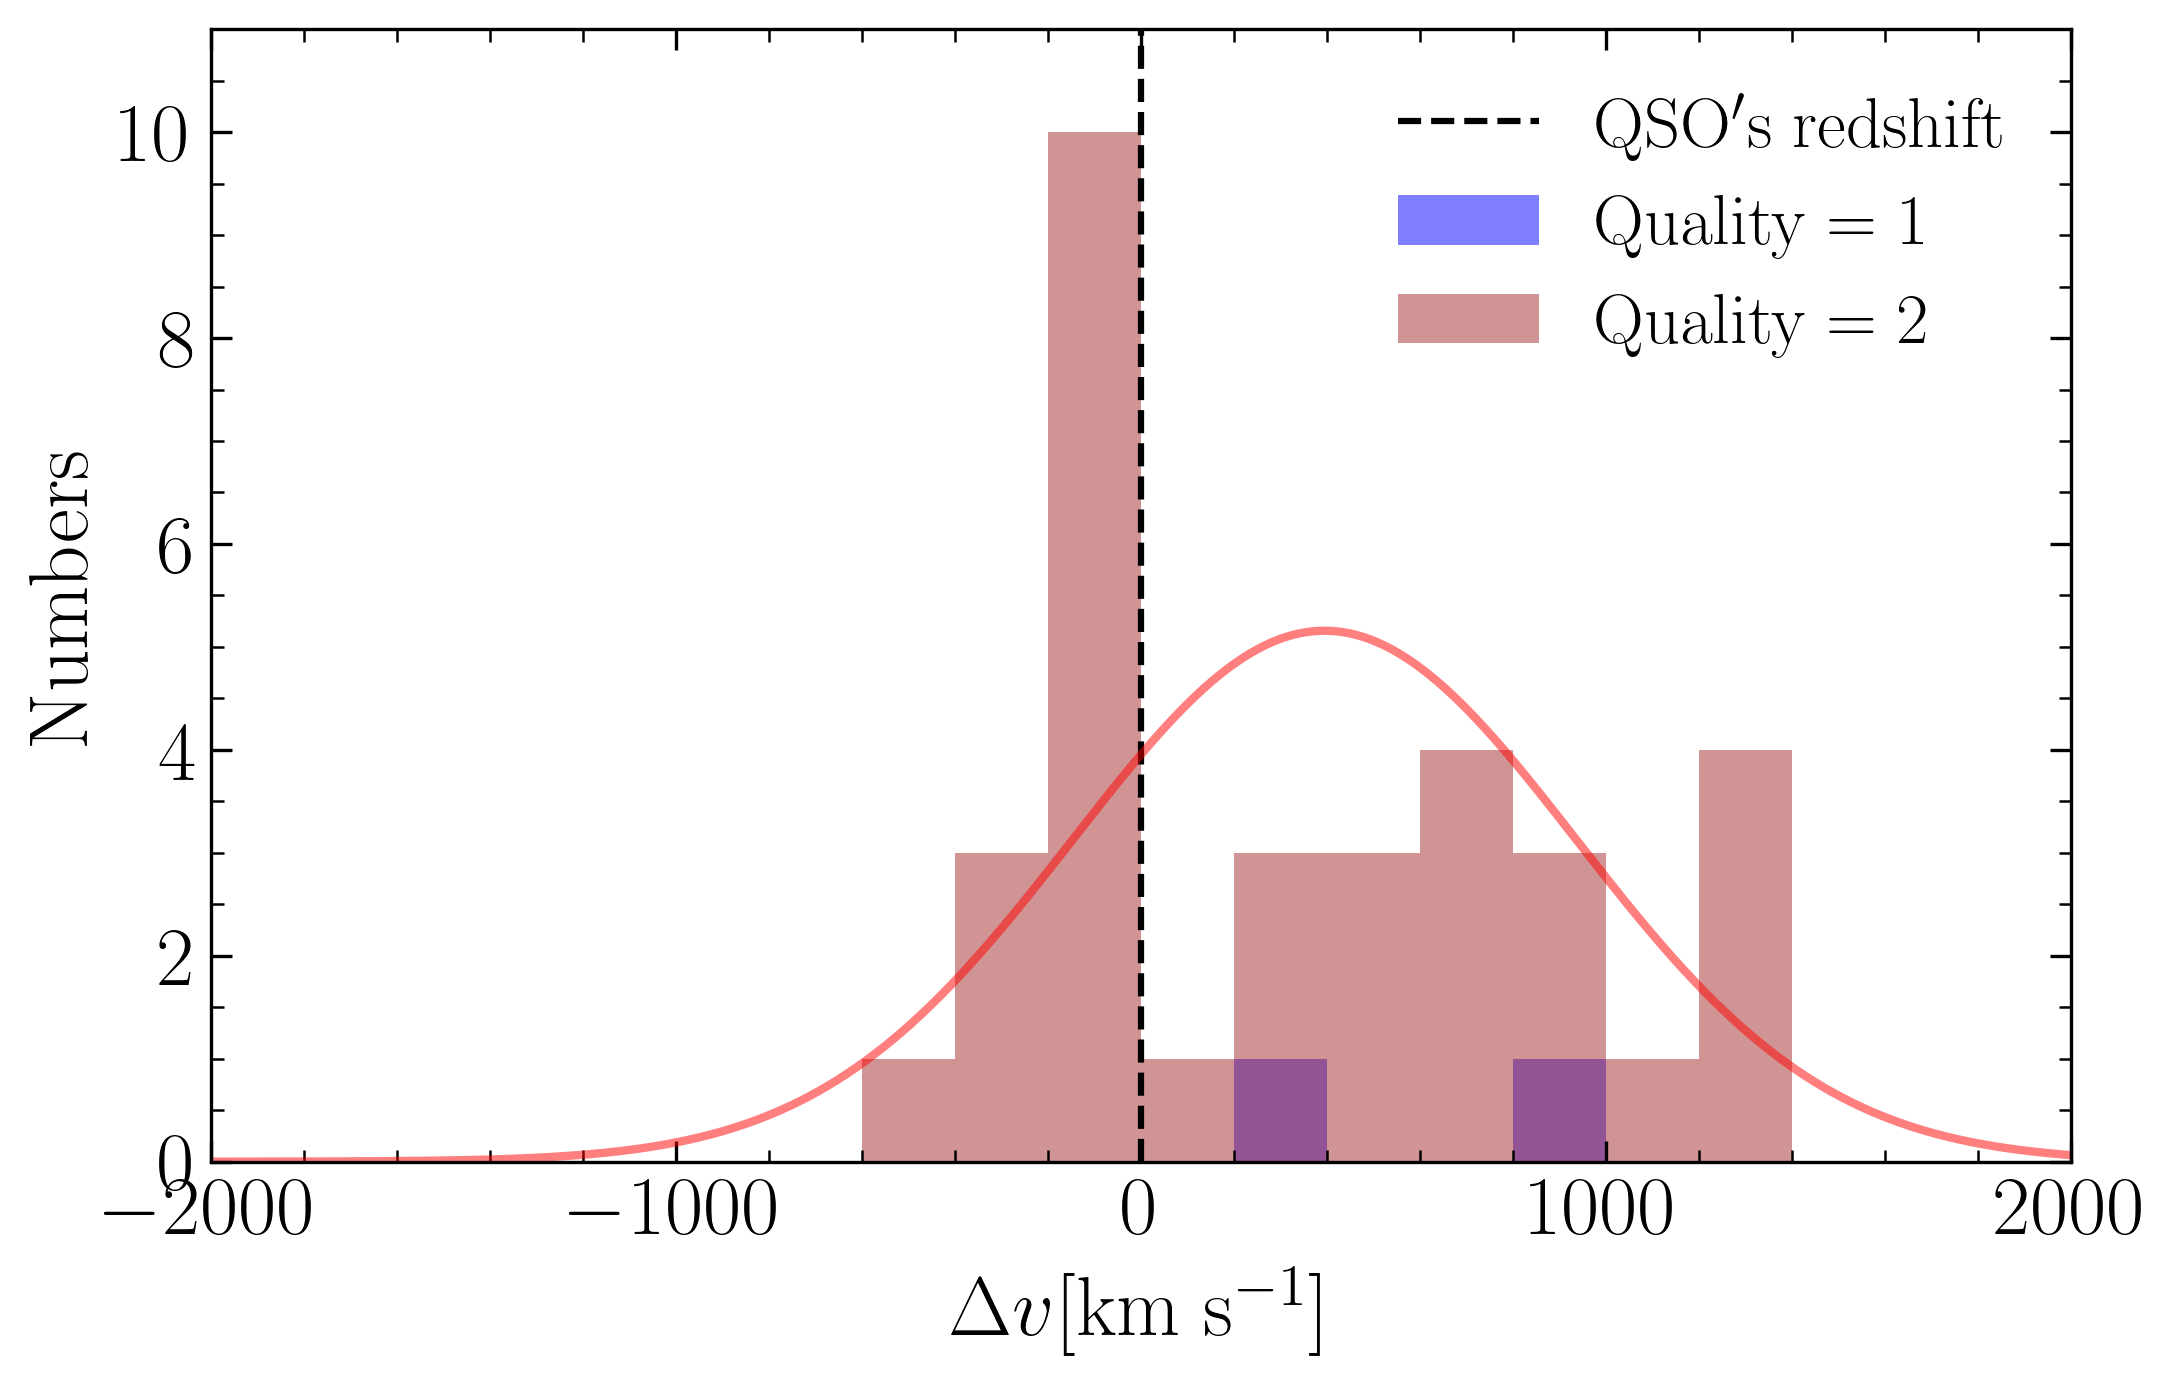

In [3]:
from scipy.stats import norm

select_gal = np.where(cl_w == 'galaxy')
row_gal = row_w[select_gal]
ID_gal = ID_w[select_gal]
z_gal = z_w[select_gal]
name_gal = name_w[select_gal]
ql_gal = ql_w[select_gal]
ra_gal, dec_gal = ra_w[select_gal], dec_w[select_gal]

select_qua = np.where((ql_gal == 1) | (ql_gal == 2))
row_qua = row_gal[select_qua]
ID_qua = ID_gal[select_qua]
z_qua = z_gal[select_qua]
v_qua = 3e5 * (z_qua - z_qso) / (1 + z_qso)
name_qua = name_gal[select_qua]
ql_qua = ql_gal[select_qua]
ra_qua, dec_qua = ra_gal[select_qua], dec_gal[select_qua]

bins = np.arange(-2000, 2200, 200)
select_z = np.where((v_qua > bins[0]) * (v_qua < bins[-1]))
row_final = row_qua[select_z]
ID_final = ID_qua[select_z]
z_final = z_qua[select_z]
v_final = v_qua[select_z]
name_final = name_qua[select_z]
ql_final = ql_qua[select_z]
ra_final, dec_final = ra_qua[select_z], dec_qua[select_z]

# fit
select_v = np.where((v_final > -2000) * (v_final < 2000))
v_fit = v_final[select_v]
mu, scale = norm.fit(v_fit)

# Normalization
nums, v_edge = np.histogram(v_fit, bins=bins)
normalization = np.sum(nums) * 200 

# 
rv = np.linspace(-2000, 2000, 1000)
plt.figure(figsize=(8, 5), dpi=300)
plt.vlines(0, 0, 11, linestyles='--', color='k', label=r"$\mathrm{QSO's \; redshift}$")
plt.hist(v_final[np.where(ql_final == 1)], bins=bins, facecolor='blue', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 1$')
plt.hist(v_final[np.where(ql_final == 2)], bins=bins, facecolor='brown', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 2$')
plt.plot(rv, normalization * norm.pdf(rv, mu, scale), '-r', lw=2, alpha=0.5,
         label=r'$\mu = $ ' + str("{0:.0f}".format(mu)) + r'$\mathrm{km/s}$, ' + '\n' + r'$\sigma = $ ' +
               str("{0:.0f}".format(scale)) + r'$\mathrm{km/s}$')
plt.xlim(-2000, 2000)
plt.ylim(0, 11)
plt.minorticks_on()
plt.xlabel(r'$\Delta v [\mathrm{km \; s^{-1}}]$', size=20)
plt.ylabel(r'$\mathrm{Numbers}$', size=20)
plt.tick_params(axis='both', which='major', direction='in', bottom='on', top='on', left='on', right='on', size=5, labelsize=20)
plt.tick_params(axis='both', which='minor', direction='in', bottom='on', top='on', left='on', right='on', size=3)
plt.legend(prop={'size': 17}, framealpha=0, loc=1, fontsize=15)

# # Redshift bins 
# # bins = np.linspace(0.6282144177077355 - 0.025, 0.6282144177077355 + 0.025, 50)
# bins = np.linspace(0.626, 0.636, 21)
# select_z = np.where((z_qua > bins[0]) * (z_qua < bins[-1]))
# ID_final = ID_qua[select_z]
# row_final = row_qua[select_z]
# z_final = z_qua[select_z]
# ql_final = ql_qua[select_z]
# ra_final, dec_final = ra_qua[select_z], dec_qua[select_z]

# # print((0.636 - 0.626) / 0.0005)
# # qso redshift: z = 0.6282144177077355
# plt.figure(figsize=(8, 5), dpi=300)
# plt.vlines(0.6282144177077355, 0, 6, linestyles='--', color='k', label=r"$\mathrm{QSO's \; redshift}$")
# plt.hist(z_final[np.where(ql_final == 1)], bins=bins, facecolor='blue', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 1$')
# plt.hist(z_final[np.where(ql_final == 2)], bins=bins, facecolor='brown', histtype='stepfilled', alpha=0.5, label=r'$ \mathrm{Quality} = 2$')

# plt.xlim(bins[0], bins[-1])
# plt.ylim(0, 6)
# plt.minorticks_on()
# plt.xlabel(r'$\mathrm{Redshift}$', size=20)
# plt.ylabel(r'$\mathrm{Numbers}$', size=20)
# plt.tick_params(axis='both', which='major', direction='in', bottom='on', top='on', left='on', right='on', size=5, labelsize=20)
# plt.tick_params(axis='both', which='minor', direction='in', bottom='on', top='on', left='on', right='on', size=3)
# plt.legend(prop={'size': 17}, framealpha=0, loc=1, fontsize=15)

In [4]:
path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'ESO_DEEP_offset.fits')

cube = Cube(path)
hdul = fits.open(path)  # open a FITS file
hdr = hdul[1].header 
wcs = WCS(hdr)

# Calculate the white image
image_white = cube.sum(axis=0)
p, q = image_white.peak()['p'], image_white.peak()['q']
p_q = wcs.sky2pix(np.vstack((dec_final, ra_final)).T, nearest=True)
p_gal, q_gal = p_q.T[0], p_q.T[1]

In [5]:
# hdul = fits.open(path)  # open a FITS file
# hdr = hdul[1].header 
# wcs = WCS(hdr)
# print(wcs)

/Users/lzq/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Log scale: values of z <= 0 have been masked
  if sys.path[0] == '':


[  1   4   5   6   7  11  13  20  27  35  36  57  62  64  68  72  78  80
  81  82  83  88  92  93 120 129 134 140 141 149 162 164 179 181 182]


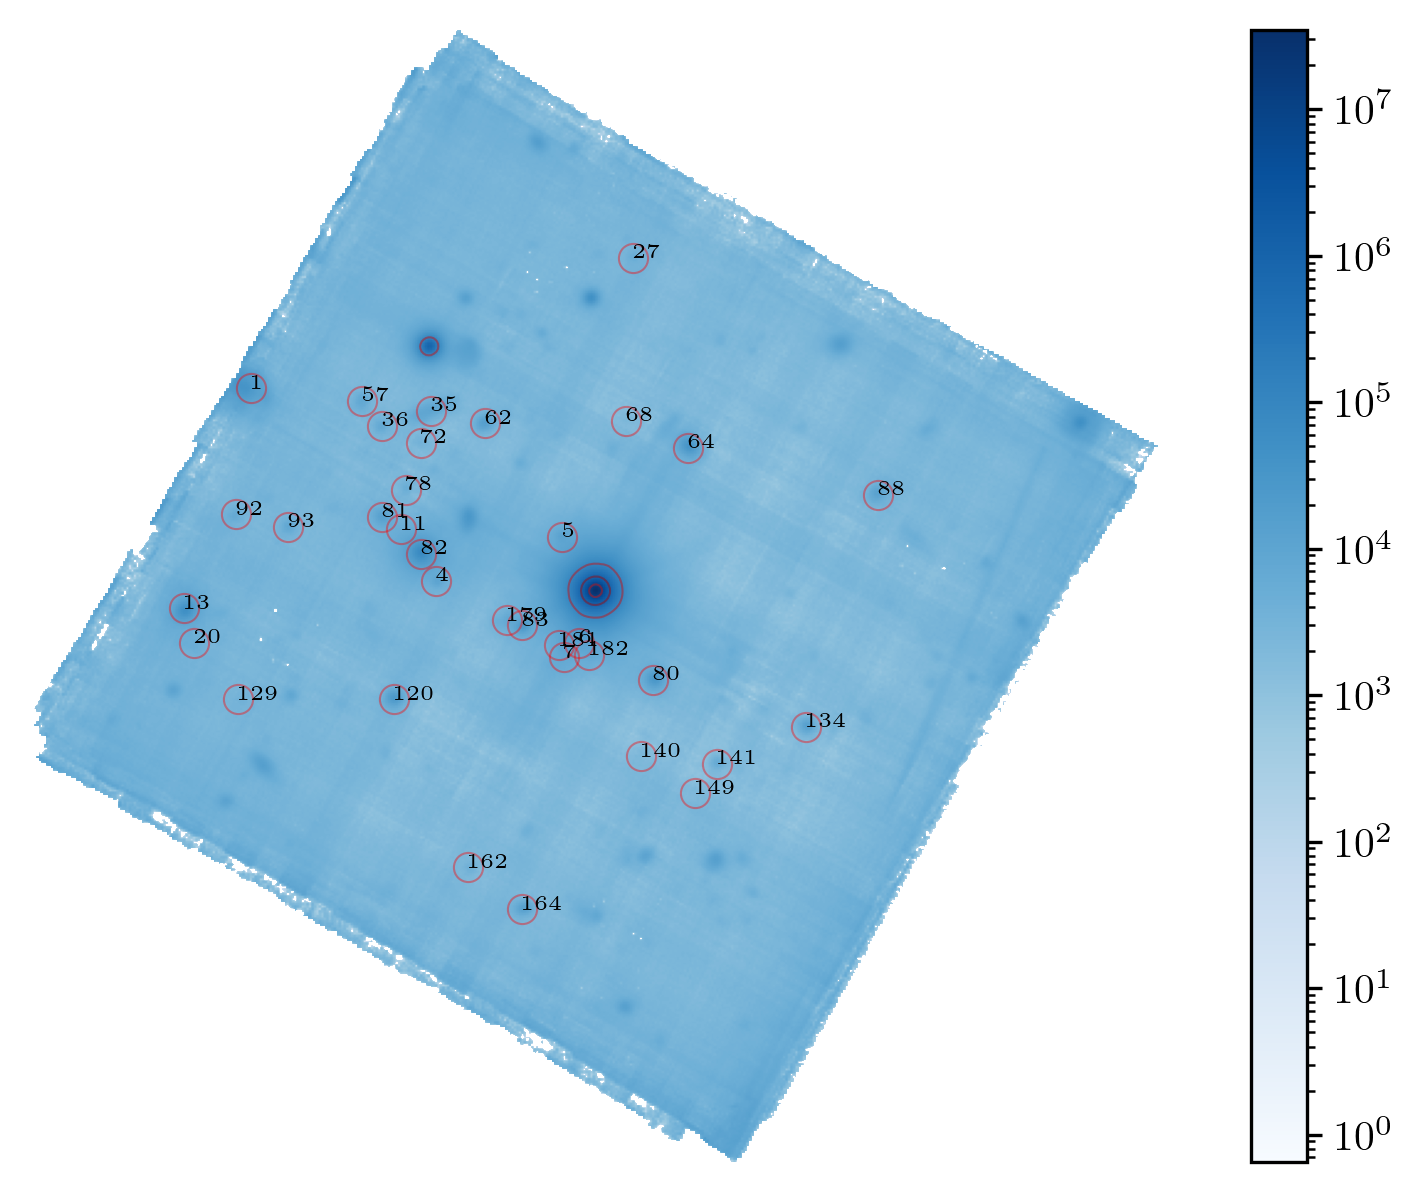

In [6]:
import matplotlib
Blues = cm.get_cmap('Blues', 256)
Reds = cm.get_cmap('Reds', 256)
newcolors = Blues(np.linspace(0, 1, 256))
newcolors_red = Reds(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)

plt.figure(figsize=(8, 5), dpi=300)
plt.imshow(image_white.data, origin='lower', cmap=newcmp, norm=matplotlib.colors.LogNorm())
cbar = plt.colorbar()
# cbar.set_label(r'$\mathrm{Arcsinh}$')
plt.contour(image_white.data, levels=[1e5, 1e6, 1e7, 1e8], colors=newcolors_red[200::30, :], linewidths=0.5, alpha=0.5, norm=matplotlib.colors.LogNorm())

plt.plot(q_gal, p_gal, 'o', color='brown', ms=7, alpha=0.4, markerfacecolor='None', markeredgecolor='red', markeredgewidth=0.5)
for i in range(len(row_final)):
    plt.annotate(str(row_final[i]), (q_gal[i], p_gal[i]), fontsize=5)
    
plt.axis('off')
#plt.xlim(200, 250)
#plt.ylim(200, 250)
print(row_final)

In [7]:
#-------Create reg file for DS9-----------
# galaxy_list = np.array([])
# for i in range(len(ra_final)):
#     galaxy_list = np.hstack((galaxy_list, np.array(['fk5; circle(' + str(ra_final[i]) + ', ' 
#                                                     + str(dec_final[i]) + ', 1") ' + ' # text = "' + str(row_final[i])
#                                                    + '"'])))
# np.savetxt('/Users/lzq/Dropbox/Data/CGM/galaxy_list.reg', galaxy_list, fmt='%s')
# -------------------------------------------

#----Gettting zero point--------------------
# from acstools import acszpt
# date = '2017-06-19'
# detector = 'WFC'

# q = acszpt.Query(date=date, detector=detector)
# zpt_table = q.fetch()

# print(zpt_table)
#-------------------------------------------

In [8]:
from astropy.wcs import WCS
from astropy.wcs.utils import skycoord_to_pixel
from astropy.wcs.utils import pixel_to_skycoord
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astropy.table import Table
from scipy import ndimage
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.axisartist.grid_finder import (FixedLocator, MaxNLocator, DictFormatter)

# Getting photometry zero point
path_hb = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'HE0238-1904_drc_offset.fits')
data_hb =  fits.getdata(path_hb, 1, ignore_missing_end=True)

path_pho = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'config', 'HE0238-1904_sex.fits')
data_pho =  fits.getdata(path_pho, 1, ignore_missing_end=True)

path_image = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'config', 'check.fits')
data_image =  fits.getdata(path_image, 1, ignore_missing_end=True)
w_pho = WCS(fits.open(path_image)[1].header)
catalog = pixel_to_skycoord(data_pho['X_IMAGE'], data_pho['Y_IMAGE'], w_pho)
c = SkyCoord(ra_final, dec_final, unit="deg") 
idx, d2d, d3d = c.match_to_catalog_sky(catalog)

# Hubble image
f_hb = fits.open(path_hb)
w_hb = WCS(f_hb[1].header)
x, y = skycoord_to_pixel(c, w_hb)

# Calculate rotation
coord_1 = SkyCoord(ra_final[10] + 0.0003, dec_final[10] + 0.01, unit="deg")
coord_2 = SkyCoord(ra_final[10] + 0.0003, dec_final[10] + 0.015, unit="deg")

x_r1, y_r1 = skycoord_to_pixel(coord_1, w_hb)
x_r2, y_r2 = skycoord_to_pixel(coord_2, w_hb)
angle = - np.arctan((y_r2 - y_r1) / (x_r2 - x_r1)) - np.pi / 2

# Photometry
data_pho = data_pho[idx]
x_image = data_pho['X_IMAGE']
y_image = data_pho['Y_IMAGE']
mag_iso = data_pho['MAG_ISO']
dmag_iso = data_pho['MAGERR_ISO']
mag_isocor = data_pho['MAG_ISOCOR']
dmag_isocor = data_pho['MAGERR_ISOCOR']
mag_auto = data_pho['MAG_AUTO']
dmag_auto = data_pho['MAGERR_AUTO']

# chech consistency 
path_hb = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'HE0238-1904_drc_offset.fits')
data_hb =  fits.getdata(path_hb, 1, ignore_missing_end=True)

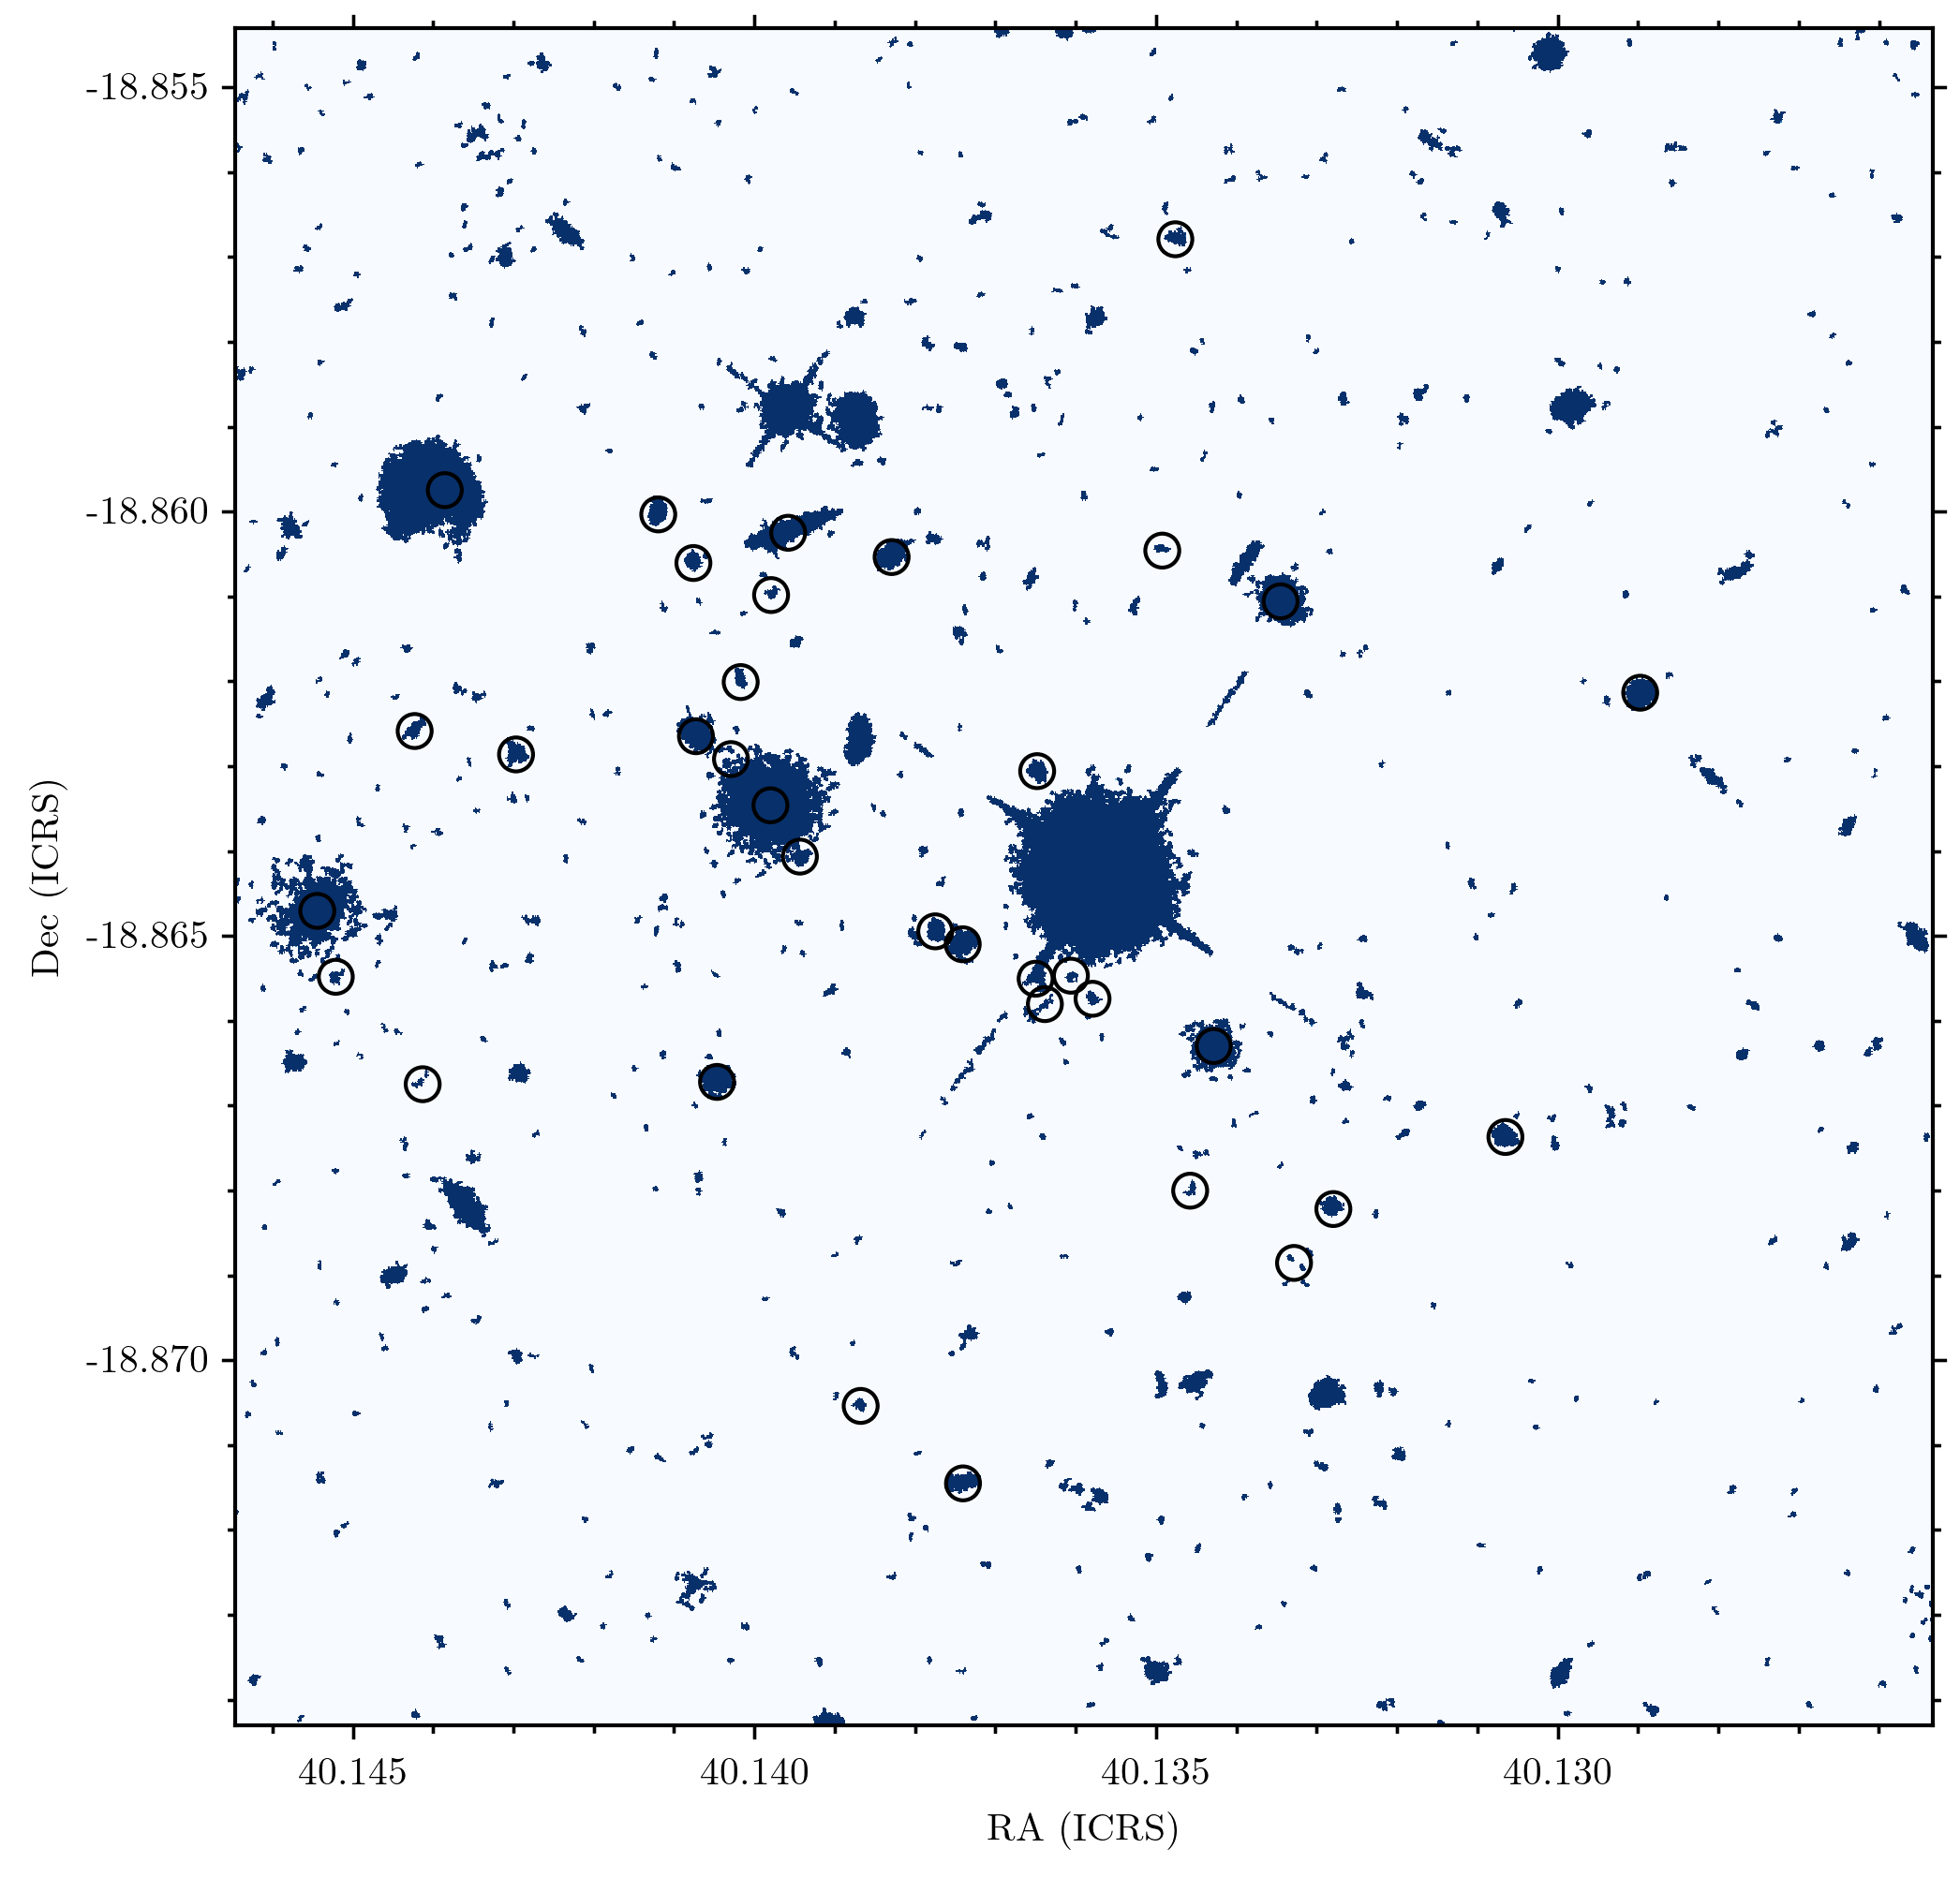

In [9]:
import aplpy

fig = plt.figure(figsize=(8, 8), dpi=300)

gc = aplpy.FITSFigure(path_image, figure=fig, north=True)


gc.show_colorscale(vmin=0, vmax=3, cmap=newcmp)
gc.set_xaxis_coord_type('scalar')
gc.set_yaxis_coord_type('scalar')
gc.recenter(40.1359, -18.8643, width=0.02, height=0.02) 
gc.show_circles(ra_final, dec_final, 0.0002)
# fig = plt.figure(figsize=(8, 8), dpi=300)
# plot_extents = 0, 4500, 0, 4500
# transform = Affine2D().rotate_deg(angle * 180 / np.pi)

# helper = floating_axes.GridHelperCurveLinear(transform, plot_extents, grid_locator1=MaxNLocator(nbins=5), 
#                                              grid_locator2=MaxNLocator(nbins=5))
# axarr = fig.add_subplot(111, axes_class=floating_axes.FloatingAxes, grid_helper=helper)
# aux_ax = axarr.get_aux_axes(transform)

# cax = aux_ax.imshow(data_image, origin='lower', vmin=0, vmax=3, cmap=newcmp, aspect='equal')
# # aux_ax.arrow(x_r1, y_r1, x_r2 - x_r1, y_r2 - y_r1, head_width=50, head_length=50, linewidth=2, color='k', length_includes_head=True)
# aux_ax.plot(x, y, 'o', color='brown', ms=5, alpha=0.4, markerfacecolor='None', markeredgecolor='red', markeredgewidth=0.5)
# aux_ax.plot(x_image, y_image, 'o', color='brown', ms=3, alpha=0.4, markerfacecolor='None', markeredgecolor='k', markeredgewidth=0.5)
# for i in range(len(row_final)):
#    aux_ax.annotate(str(row_final[i]), (x_image[i], y_image[i]), fontsize=7)
# # cbar = fig.colorbar(cax, ax=aux_ax)
# # cbar.set_label(r'$\mathrm{Arcsinh}$')
# axarr.axis["bottom"].set_visible(False)
# axarr.axis["top"].set_visible(False)
# axarr.axis["left"].set_visible(False)
# axarr.axis["right"].set_visible(False)
# # aux_ax.xaxis.set_view_interval(0, 5000, ignore=True)
# # aux_ax.yaxis.set_view_interval(-5000, -3000, ignore=True)
# aux_ax.set_xlim(0, 1000)
# aux_ax.set_ylim(-5000, -3000)



# 
# plt.figure(figsize=(10, 5), dpi=300)
# plt.imshow(10 ** data_hb, origin='lower', vmin=0, vmax=3, cmap=newcmp)
# cbar = plt.colorbar()
# # cbar.set_label(r'$\mathrm{Arcsinh}$')
# plt.plot(x, y, 'o', color='brown', ms=7, alpha=0.4, markerfacecolor='None', markeredgecolor='red', markeredgewidth=0.5)
# plt.plot(x_image, y_image, 'o', color='brown', ms=5, alpha=0.4, markerfacecolor='None', markeredgecolor='k', markeredgewidth=0.5)
# for i in range(len(row_final)):
#     plt.annotate(str(row_final[i]), (x[i], y[i]), fontsize=7)
# plt.xlim(2000, 4000)
# plt.ylim(2500, 4000)


In [10]:
# Filter and galaxy extinction 
import sfdmap
    
# HST_filter_path = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'data', 'CGM', 'filters', 'HST_filters_list.txt')
# HST_filter = np.loadtxt(HST_filter_path)
# print(HST_filter_path)

dustmap_path  = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'PyQSOfit', 'sfddata')
m = sfdmap.SFDMap(dustmap_path)
ebv_array = m.ebv(ra_final, dec_final)
m_ex = 0.611 * 3.2 * ebv_array

mag_iso_dred = mag_iso - m_ex
mag_isocor_dred = mag_isocor - m_ex
mag_auto_dred = mag_auto - m_ex


dmag_iso_dred = dmag_iso
dmag_isocor_dred = dmag_isocor
dmag_auto_dred = dmag_auto

# Compare with Legacy survey 
# data = Table()
# data["RA"] = ra_final
# data["DEC"] = dec_final
# data['ID'] = row_final
# #data["NAME"] =  np.core.defchararray.add(np.char.mod('%d', row_final), np.repeat(np.array(['o']), len(row_final)))
# #data["COLOR"] = np.repeat(np.array(['black']), len(row_final))
# #data["RADIUS"] = np.repeat(np.array(['1']), len(row_final))
# ascii.write(data, 'galaxys_list_xmatch.csv', format='csv', overwrite=True)


gal_col = [r"Row", r"Ra", r"Dec",  r"Mag_iso", r"Mag_isocor", r"Mag_auto"]
gal_phot = np.stack([row_final, ra_final, dec_final, mag_iso_dred, mag_isocor_dred, mag_auto_dred], axis=1)
Table_1 = pd.DataFrame(gal_phot, index=1 + np.arange(len(row_final)), columns=gal_col)
Table_1



,Row,Ra,Dec,Mag_iso,Mag_isocor,Mag_auto
1,1.0,40.143855,-18.859747,20.078410,19.986676,20.043708
2,4.0,40.139434,-18.864066,19.945190,19.863693,19.914560
3,5.0,40.136480,-18.863059,23.837061,23.718796,23.728369
4,6.0,40.136060,-18.865469,26.011285,25.659076,25.140815
5,7.0,40.136384,-18.865804,25.657790,25.142751,24.615081
6,11.0,40.140292,-18.862917,27.024971,26.647144,25.737951
7,13.0,40.145442,-18.864705,20.599597,20.514619,20.571710
8,20.0,40.145212,-18.865482,25.713919,25.341935,24.835720
9,27.0,40.134760,-18.856791,24.750196,24.466707,24.520679
10,35.0,40.139579,-18.860250,22.255588,22.068576,22.168785


In [11]:
path_pho_des = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'des_dr2_galaxys_pho.fits')
data_pho_des = fits.getdata(path_pho_des, 1, ignore_missing_end=True)


row_des = data_pho_des['t1_id']
mag_g_dred = data_pho_des['mag_auto_g_dered']
mag_r_dred = data_pho_des['mag_auto_r_dered']
mag_i_dred = data_pho_des['mag_auto_i_dered']
mag_z_dred = data_pho_des['mag_auto_z_dered']
mag_Y_dred = data_pho_des['mag_auto_Y_dered']

dmag_g_dred = data_pho_des['magerr_auto_g']
dmag_r_dred = data_pho_des['magerr_auto_r']
dmag_i_dred = data_pho_des['magerr_auto_i']
dmag_z_dred = data_pho_des['magerr_auto_z']
dmag_Y_dred = data_pho_des['magerr_auto_Y']


# Combine photometry 
col_ID = np.arange(len(row_final))
have_des_pho = np.in1d(row_final, row_des)
print(row_des)
print(row_final)
print(col_ID[have_des_pho])

mag_all = np.zeros((len(row_final), 6))
dmag_all = mag_all.copy()
mag_all[:, 0], dmag_all[:, 0] = mag_auto_dred, dmag_auto_dred
mag_all[col_ID[have_des_pho], 1:] =  np.array([mag_g_dred, mag_r_dred, mag_i_dred, mag_z_dred, mag_Y_dred]).T
dmag_all[col_ID[have_des_pho], 1:] =  np.array([dmag_g_dred, dmag_r_dred, dmag_i_dred, dmag_z_dred, dmag_Y_dred]).T


mag_all = np.where((mag_all != 0) * (mag_all != 99), mag_all, np.inf)
dmag_all = np.where((dmag_all != 0) * (dmag_all != 99), dmag_all, 0)

flux_all =  10 ** ((23.9 - mag_all) / 2.5) # microjanskys
flux_all_err = flux_all * np.log(10) * dmag_all / 2.5
flux_all_err = np.where(flux_all_err != 0, flux_all_err, 99)
print(np.array([flux_all[9], flux_all_err[9]]).T)

[  1  13  35  36  57  62  64  80  82  88  93 120 134 141 164]
[  1   4   5   6   7  11  13  20  27  35  36  57  62  64  68  72  78  80
  81  82  83  88  92  93 120 129 134 140 141 149 162 164 179 181 182]
[ 0  6  9 10 11 12 13 17 19 21 23 24 26 28 31]
[[ 4.92590664  0.06558674]
 [ 0.81731525  0.23106531]
 [ 3.11512014  0.29224114]
 [ 7.15520367  0.49505877]
 [11.74470195  1.22134737]
 [22.29554023  3.34609887]]


In [12]:
from astropy.table import Table

def bin(spectrum, binn):
    """ Bins up two or three column spectral data by a specified factor. """

    binn = int(binn)
    nbins = len(spectrum)/binn
    binspec = np.zeros((int(nbins), spectrum.shape[1]))

    for i in range(binspec.shape[0]):
        spec_slice = spectrum[i*binn:(i+1)*binn, :]
        binspec[i, 0] = np.mean(spec_slice[:, 0])
        binspec[i, 1] = np.mean(spec_slice[:, 1])

        if spectrum.shape[1] == 3:
            binspec[i,2] = (1./float(binn)
                            *np.sqrt(np.sum(spec_slice[:, 2]**2)))

    return binspec

def load_data(row):
    
    row_sort = np.where(row_final == float(row))
    
    flux = flux_all[row_sort][0]
    flux_err = flux_all_err[row_sort][0]
    phot = np.array([flux, flux_err]).T
    
    path_spe = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'redshifting', 'ESO_DEEP_offset_zapped_spec1D', 
                            row + '_' + str(ID_final[row_sort][0]) + '_' + name_final[row_sort][0] + '_spec1D.fits')
    spec = Table.read(path_spe)
    spec = spec[spec['mask'] == 1]
    
    wave = pyasl.vactoair2(spec['wave'])
    flux = spec['flux'] * 1e-20
    flux_err = spec['error'] * 1e-20
    
    spectrum = np.array([wave, flux, flux_err]).T
    return bin(spectrum, 10), phot
# bin(spectrum, 5), phot
# bin(spectrum, 10)
# phot
#bin(spectrum, 20), phot

[  1  13  35  36  57  62  64  80  82  88  93 120 134 141 164]


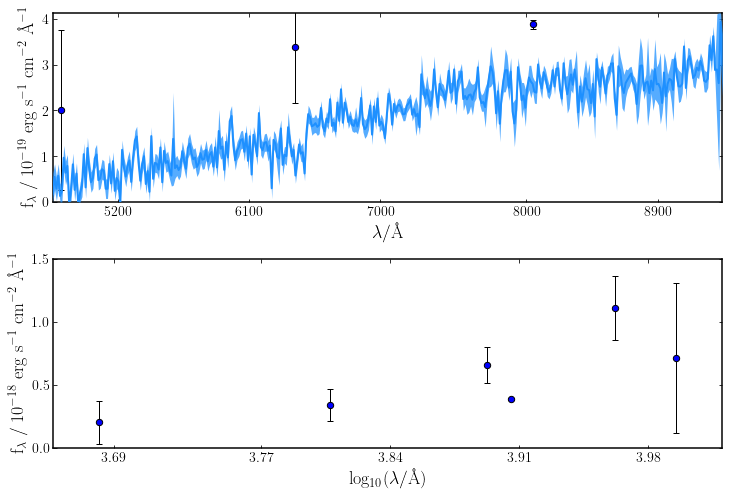

(<Figure size 864x576 with 2 Axes>,
 [<AxesSubplot:xlabel='$\\lambda / \\mathrm{\\AA}$', ylabel='$\\mathrm{f_{\\lambda}}\\ \\mathrm{/\\ 10^{-19}\\ erg\\ s^{-1}\\ cm^{-2}\\ \\AA^{-1}}$'>,
  <AxesSubplot:xlabel='$\\mathrm{log_{10}}\\big(\\lambda / \\mathrm{\\AA}\\big)$', ylabel='$\\mathrm{f_{\\lambda}}\\ \\mathrm{/\\ 10^{-18}\\ erg\\ s^{-1}\\ cm^{-2}\\ \\AA^{-1}}$'>])

In [13]:
import bagpipes as pipes
print(row_des)
row_number = '36'
# filt_list=np.loadtxt("filters/filters_list.txt", dtype="str")
galaxy = pipes.galaxy(row_number, load_data, filt_list=np.loadtxt("filters/filters_list.txt", dtype="str"))
galaxy.plot()

In [ ]:
dblplaw = {}                        
dblplaw["tau"] = (0., 15.)            
dblplaw["alpha"] = (0.01, 1000.)
dblplaw["beta"] = (0.01, 1000.)
dblplaw["alpha_prior"] = "log_10"
dblplaw["beta_prior"] = "log_10"
dblplaw["massformed"] = (1., 15.)
dblplaw["metallicity"] = (0.1, 2.)
dblplaw["metallicity_prior"] = "log_10"

nebular = {}
nebular["logU"] = -3.

dust = {}
dust["type"] = "CF00"
dust["eta"] = 2.
dust["Av"] = (0., 2.0)
dust["n"] = (0.3, 2.5)
dust["n_prior"] = "Gaussian"
dust["n_prior_mu"] = 0.7
dust["n_prior_sigma"] = 0.3

fit_instructions = {}
fit_instructions["redshift"] = z_final[np.where(row_final == float(row_number))]
fit_instructions["t_bc"] = 0.01
fit_instructions["dblplaw"] = dblplaw 
fit_instructions["nebular"] = nebular
fit_instructions["dust"] = dust

# exp = {}                                  # Tau-model star-formation history component
# exp["age"] = (0.1, 15.)                   # Vary age between 100 Myr and 15 Gyr. In practice 
#                                           # the code automatically limits this to the age of
#                                           # the Universe at the observed redshift.
# exp["tau"] = (0.1, 10.)                   # Vary tau between 300 Myr and 10 Gyr
# exp["massformed"] = (1., 15.)             # vary log_10(M*/M_solar) between 1 and 15
# exp["metallicity"] = (0., 2.5)            # vary Z between 0 and 2.5 Z_oldsolar

# dust = {}                                 # Dust component
# dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
# dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes


# fit_instructions = {}                     # The fit instructions dictionary
# fit_instructions["redshift"] = z_final[np.where(row_final == float(row_number))] # Vary observed redshift from 0 to 10
# fit_instructions["exponential"] = exp   
# fit_instructions["dust"] = dust

# Velocity dispersion
fit_instructions["veldisp"] = (1., 1000.)   #km/s
fit_instructions["veldisp_prior"] = "log_10"

calib = {}
calib["type"] = "polynomial_bayesian"

calib["0"] = (0.5, 1.5) # Zero order is centred on 1, at which point there is no change to the spectrum.
calib["0_prior"] = "Gaussian"
calib["0_prior_mu"] = 1.0
calib["0_prior_sigma"] = 0.25

calib["1"] = (-0.5, 0.5) # Subsequent orders are centred on zero.
calib["1_prior"] = "Gaussian"
calib["1_prior_mu"] = 0.
calib["1_prior_sigma"] = 0.25

calib["2"] = (-0.5, 0.5)
calib["2_prior"] = "Gaussian"
calib["2_prior_mu"] = 0.
calib["2_prior_sigma"] = 0.25

fit_instructions["calib"] = calib

fit = pipes.fit(galaxy, fit_instructions)
fit.fit(verbose=False)

In [ ]:
fig = fit.plot_spectrum_posterior(save=True, show=True)
fig = fit.plot_sfh_posterior(save=True, show=True)
fig = fit.plot_corner(save=True, show=True)

In [ ]:
# from astropy.wcs import WCS
# from astropy.wcs.utils import skycoord_to_pixel
# from astropy.coordinates import SkyCoord
# from astropy.io import ascii
# from astropy.table import Table


# # f_muse = fits.open(path)
# f_hb = fits.open(path_hb)
# # w_muse = WCS(f_muse[1].header)
# w_hb = WCS(f_hb[1].header)
# c = SkyCoord(ra_final, dec_final, unit="deg") 
# x, y = skycoord_to_pixel(c, w_hb)


# # data = Table()
# # data['ID'] = ID_final
# # data['x'] = x
# # data['y'] = y
# # ascii.write(data, 'galaxys.list', overwrite=True)


# path_hb = os.path.join(os.sep, 'Users', 'lzq', 'Dropbox', 'Data', 'CGM', 'HE0238-1904_drc_offset.fits')
# data_hb =  fits.getdata(path_hb, 1, ignore_missing_end=True)

# f_hb = fits.open(path_hb)
# # w_muse = WCS(f_muse[1].header)
# w_hb = WCS(f_hb[1].header)
# c = SkyCoord(ra_final, dec_final, unit="deg") 
# x, y = skycoord_to_pixel(c, w_hb)



# print(len(x))
# plt.figure(figsize=(10, 5), dpi=300)
# plt.imshow(10 ** data_hb, origin='lower', vmin=0, vmax=3, cmap=newcmp)
# cbar = plt.colorbar()
# cbar.set_label(r'$\mathrm{Arcsinh}$')
# plt.plot(x, y, 'o', color='brown', ms=7, alpha=0.4, markerfacecolor='None', markeredgecolor='red', markeredgewidth=0.5)
# plt.xlim(2000, 4000)
# plt.ylim(2500, 4000)

# Segmentation map source extractor